In [1]:
import sys
sys.path.append('../../Scripts')
from PostProcessingScripts import * 
import pandas as pd 
import string 
# just to make the cells appear wider:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# adjust fontsize 
# fs=20
# import ClassMSSFR
# from matplotlib.ticker import (FormatStrFormatter,
#                                AutoMinorLocator)

In [2]:
MSSFRnameslist = []
MSSFRnameslist.append('000') # add phenomenological 

for ind_SFR, SFR in enumerate(SFRs):
	ind_x = ind_SFR+1
	for ind_GSMF, GSMF in enumerate(GSMFs):
		ind_y = ind_GSMF + 1
		for ind_MZ, MZ in enumerate(MZs):
			ind_z = ind_MZ +1

			MSSFRnameslist.append('%s%s%s'%(ind_x, ind_y, ind_z))
            
            
MSSFRnameslistCSV = ['.0.0.0', '.1.1.1', '.1.1.2', '.1.1.3', '.1.2.1', '.1.2.2', '.1.2.3', '.1.3.1', '.1.3.2', '.1.3.3', '.2.1.1', '.2.1.2', '.2.1.3', '.2.2.1', '.2.2.2', '.2.2.3', '.2.3.1', '.2.3.2', '.2.3.3', '.3.1.1', '.3.1.2', '.3.1.3', '.3.2.1', '.3.2.2', '.3.2.3', '.3.3.1', '.3.3.2', '.3.3.3']
for ind_SFRD, SFRD in enumerate(MSSFRnameslistCSV):
    if SFRD in ['.0.0.0', '.2.3.1', '.3.1.2']:
        print(ind_SFRD, SFRD)
        print(MSSFRnameslist[ind_SFRD])
        
        
        

        
        


0 .0.0.0
000
16 .2.3.1
231
20 .3.1.2
312


In [3]:
def calculateMaxVariations(whichRate='intrinsic', DCO_ind=0, BPSnameslist=BPSnameslist):

    
    
    minMaxMSSFRrates = []
    minMaxBPSrates = []
    meanScatterMSSFRrates = []
    meanScatterBPSrates = []
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]


    
    
    
#     nrDATAready = 11
#     nModels=11
#     BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    
    existingBPSnameslist_ind = np.arange(len(BPSnameslist))
    
    # if you want to exclude model E:
#     existingBPSnameslist_ind = [0,1,2,3,5,6,7,8,9,10,11,12,13,14]
#     print(existingBPSnameslist_ind)
    
    
    
    minMaxMSSFR     = np.zeros((2,len(MSSFRnameslist)))
    percentileMSSFR = np.zeros((3,len(MSSFRnameslist)))
    minMaxBPS       = np.zeros((2,len(existingBPSnameslist_ind)))
    percentileBPS   = np.zeros((3,len(existingBPSnameslist_ind)))
    
    
    
    
    

        
    for ind_L, MSSFRname in enumerate(MSSFRnameslist):

        stringgg =  'AllDCOsimulation'

        df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/rates_MSSFR_Models_' + TypesLabels[DCO_ind] + '_' + stringgg +  '.csv' 
        df = pd.read_csv(df_name, index_col=0).T
        rates_L = df[MSSFRnameslistCSV[ind_L]]
#         print(df)

        if whichRate =='intrinsic':
            rates = rates_L[::2]
#             if ind_L==0:
#                 print('the intrinsic fiducial rate =',rates[0]) 
#                 print()

        elif whichRate=='observed':
            rates = rates_L[1::2]
#             if ind_L==0:
#                 print('the observed fiducial rate =',rates[0]) 
#             ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'

        # over different models
        
        rates = np.asarray(rates)[existingBPSnameslist_ind]
        
        
        minMaxMSSFR[:,ind_L] = np.asarray([np.min(rates), np.max(rates)])
        percentileMSSFR[:,ind_L] = np.asarray([np.percentile(a=rates,q=50), np.percentile(a=rates,q=5), np.percentile(a=rates,q=95)])

  
        for ind, modelname in enumerate(np.asarray(BPSnameslist)[existingBPSnameslist_ind]):
            ind_m = existingBPSnameslist_ind[ind]
            
            stringgg =  'AllDCOsimulation'
            df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/rates_MSSFR_Models_' + TypesLabels[DCO_ind]  + '_' + stringgg + '.csv' 
            df = pd.read_csv(df_name, index_col=0)

            if whichRate =='intrinsic':
                namez0 = modelname + ' intrinsic (z=0) [Gpc^{-3} yr^{-1}]'
                rates = df[namez0]

#                     if ind_L==0:
#                         print('the intrinsic fiducial rate =',rates[0])            

            elif whichRate=='observed':
                nameObs = modelname + ' observed (design LVK) [yr^{-1}]'
                rates = df[nameObs]

#                     if ind_L==0:
#                         print('the observed fiducial rate =',rates[0]) 
                ylabel = r'$\mathcal{R}_{\rm{det}} / $\mathcal{R}_{\rm{det}}^{\rm{BHBH}}$'

            minMaxBPS[:,ind] = np.asarray([np.min(rates), np.max(rates)])
            percentileBPS[:,ind] = np.asarray([np.percentile(a=rates,q=50), np.percentile(a=rates,q=5), np.percentile(a=rates,q=95)])


    return minMaxMSSFR, percentileMSSFR, minMaxBPS, percentileBPS




In [5]:
fs = 28 


NSNSrate0 = [320-240,320+490] # Gpc-3 yr-1 from: https://arxiv.org/pdf/2010.14533.pdf
BHBHrate0 = [23.9-8.6, 23.9+14.9] #for z=0  Gpc-3 yr-1 from: https://arxiv.org/pdf/2010.14533.pdf
BHNSrate0 = [0,610] # Gpc-3 yr-1 from: hhttps://arxiv.org/pdf/2010.14533.pdf

NSNSrate1 = [250,2810] # Gpc-3 yr-1 from: https://arxiv.org/pdf/2001.01761.pdf
BHBHrate1 = [9.7,101] # Gpc-3 yr-1 from: https://arxiv.org/pdf/1811.12907.pdf
BHNSrate1 = [0,610] # Gpc-3 yr-1 from: https://arxiv.org/pdf/1811.12907.pdf 


BHBHratez0 = [19.7-15.9, 19.7+57.3] # see point 3 in conclusion https://arxiv.org/pdf/2010.14533.pdf




def plot_rates_ratio(axe=None, whichRate='intrinsic', ylims=[0,1]):

    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    
    
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    ObservedRatesListOld = [BHBHrate1, BHNSrate1, NSNSrate1]
    
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    
    maxRatio_BHNS = -100
    maxRatio_BNS = -100
    maxRatio_BHNSBNS = -100
    minRatio_BHNS = 100
    minRatio_BNS = 100    
    minRatio_BHNSBNS =100    

    
    
    # 16 because we do all 17 models minus 'E'
    overall_max_BHNS = np.ones(17) * -100  
    overall_min_BHNS = np.ones(17) *  100
    overall_max_NSNS = np.ones(17) * -100  
    overall_min_NSNS = np.ones(17) *  100
    
    for ind_L, MSSFRname in enumerate(MSSFRnameslist):
#         if MSSFRname in  ['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']:

        for ind_t, DCOtype in enumerate(Types):



            stringgg = 'AllDCOsimulation'
            df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/rates_MSSFR_Models_' + TypesLabels[ind_t] + '_' + stringgg + '.csv' 
            df = pd.read_csv(df_name, index_col=0).T
            rates_L = df[MSSFRnameslistCSV[ind_L]]


            if whichRate =='intrinsic':
                rates = rates_L[::2][0:nModels]
                if ind_L==0:
                    print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

                ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'



            elif whichRate=='observed':
                rates = rates_L[1::2][0:nModels]
                if ind_L==0:
                    print('the observed fiducial rate for ', DCOtype ,'=',rates[0]) 
#                     ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'
                    ylabel = r'$\mathcal{R}_{\rm{det}} / \mathcal{R}_{\rm{det}}^{\rm{BHBH}}  $'

#             # this removes model E from list 
#             rates = np.asarray([x for i,x in enumerate(rates) if x!=rates[4]])

            # obtain rates:
            if DCOtype=='BBH':
                rates_BBH = rates
            elif DCOtype=='BHNS':
                rates_BHNS = rates
            elif DCOtype=='BNS':
                rates_BNS = rates

        # obtain ratios
        rates_BHNS = rates_BHNS * (1./rates_BBH)
        rates_BNS = rates_BNS * (1./rates_BBH)
        if ind_L==0:
            print('fiducial BHNS ratio = ', rates_BHNS[0])
            print('fiducial NSNS ratio = ', rates_BNS[0])
            print('per 44 BHBHs:')
            print('fiducial BHNS ratio = ', rates_BHNS[0]*44)
            print('fiducial NSNS ratio = ', rates_BNS[0]*44)                

        if MSSFRname=='231':
            COLOR=TypeColours[ind_t]#'teal'
            zorder=10
            label=MSSFRnameslist[ind_L] 
            ls = MSSFRlinestyles[1]
            ALPHA=1
            lw=3.6
        elif MSSFRname=='312':
            COLOR=TypeColours[ind_t]#'c'
            zorder=10
            label=MSSFRnameslist[ind_L]
            ls = MSSFRlinestyles[2]
            ALPHA=1
            lw=3.6

        else:
            COLOR=TypeColours[ind_t]# 'lightgray' #MSSFRcolors[ind_L]
            zorder=2
            label=None    
            ls = MSSFRlinestyles[0]
            ALPHA=0.24
            lw=3

#         if MSSFRname in ['111', '121', '131', '211', '221', '231', '311', '321', '331']:
#             COLOR = 'gray'


        maxRatio_BHNS = np.max(np.concatenate(([maxRatio_BHNS], rates_BHNS)))
        maxRatio_BNS  = np.max(np.concatenate(([maxRatio_BNS], rates_BNS)))
        maxRatio_BHNSBNS = np.max(np.concatenate(([maxRatio_BHNSBNS], rates_BHNS/rates_BNS)))
        minRatio_BHNS = np.min(np.concatenate(([minRatio_BHNS], rates_BHNS)))
        minRatio_BNS  = np.min(np.concatenate(([minRatio_BNS], rates_BNS))) 
        minRatio_BHNSBNS = np.min(np.concatenate(([minRatio_BHNSBNS], rates_BHNS/rates_BNS)))


        overall_max_BHNS = np.amax([overall_max_BHNS, rates_BHNS], axis=0)
        overall_min_BHNS = np.amin([overall_min_BHNS, rates_BHNS], axis=0)
        overall_max_NSNS = np.amax([overall_max_NSNS, rates_BNS], axis=0)
        overall_min_NSNS = np.amin([overall_min_NSNS, rates_BNS], axis=0)         



        axe.plot(range(len(rates)), rates_BHNS, c=TypeColours[1], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe.scatter(range(len(rates)), rates_BHNS, c=TypeColours[1], s=30, zorder=zorder, alpha=ALPHA)


        axe.plot(range(len(rates)), rates_BNS, c=TypeColours[2], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe.scatter(range(len(rates)), rates_BNS, c=TypeColours[2], s=30,  zorder=zorder, alpha=ALPHA) 



            
            
            
#         else:
#             print('pass MSSFR %s'%MSSFRname)

    axe.fill_between(x=range(len(rates)), y1=overall_min_BHNS, y2=overall_max_BHNS, color=TypeColours[1], alpha=0.3)
    axe.fill_between(x=range(len(rates)), y1=overall_min_NSNS, y2=overall_max_NSNS, color=TypeColours[2], alpha=0.3)   

    ## set some of the axes ranges 
    xmin = -1.2
    xmax = nModels -0.5 # change to len(df.T)
#         xmax_compare = xmax+5


    # FIX
    fix=1


    axe.text(0.05, 0.84, s=r'\textbf{BHNS}', rotation = 0, fontsize = fs+2, color = TypeColours[1], ha = 'left', va='top', transform=axe.transAxes, weight = 'bold')
    axe.text(0.75, 0.15, s=r'\textbf{NSNS}', rotation = 0, fontsize = fs+2, color = TypeColours[2], ha = 'left', va='top', transform=axe.transAxes, weight = 'bold')
#         axe[ind_t,0].text(-0.6, maxx*1.05, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='bottom')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')





    xx = np.linspace(xmin,xmax,15)


    if background==False:
        for ll in [0.001, 0.01, 0.1, 1]:
            axe.plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
    else:
        axe.fill_between(xx, (1/44)*np.ones_like(xx), 2*np.ones_like(xx),  color='lightgray', alpha=0.25,  zorder=0) 
        axe.plot(xx, (1/44)*np.ones_like(xx), c='b', linestyle='dashdot', lw=1, zorder=0, alpha=0.2)
        axe.text(0.815, 0.96, s=r'$>1$ \textbf{detection per O1+O2+O3}', rotation = 0, fontsize = fs-7, color = 'b', ha = 'left', va='top', transform=axe.transAxes, weight = 'bold')
        
#     axe.set_ylim(ylims[0], ylims[1] )


#         # make up axes
#         if ind_t ==2:
    xlabel = r'\textbf{binary population synthesis model} $\mu$'
#         else:
#             xlabel=r'  $\_$ '

    axe.set_xlim(xmin, xmax)
    axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False)
    axe.set_yscale('log')





#     BPSnameslist_withoutE = list(string.ascii_uppercase)[0:17]
#     BPSnameslist_withoutE.remove('E')

#     physicalnames=[]
#     for ind_m, bps_model in enumerate(BPSnameslist):
#         physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
#     ax2y = axe.twiny()
#     ax2y.set_xlim(xmin, xmax)

#     ax2y.set_xticks(range(len(BPSnameslist)))
#     ax2y.set_xticklabels(physicalnames, fontsize=fs-7, rotation=30)#, orientation=30)      



    physicalnames = []
    for ind_m, bps_model in enumerate(BPSnameslist):
        physicalnames.append(r'\textbf{%s}'%(bps_model) )
    axe.set_xticks(range(len(BPSnameslist)))
    axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

    axe.set_ylim(ylims[0], ylims[1] )
    axe.set_xlim(xmin, xmax)


    
    ###############################################################
    ax2x = axe.twinx()
    ax2x.set_ylim(ylims[0]*44, ylims[1]*44)


#     ax2x = layoutAxesSpecial(ax2x, nameY='Rate per 44 BH-BH mergers', fontsize=24)
    
    ax2x = layoutAxes(ax2x, nameX=xlabel, nameY='Rate per 44 BH-BH mergers', setMinor=False)
    ax2x.set_yscale('log')
    ax2x.spines["right"].set_edgecolor('b')
    ax2x.tick_params(axis='y', colors='b', labelsize=24)
    ax2x.yaxis.label.set_color('b')


    
    
    ###### LOTS OF LINES, just plotting the Overall error bars on the far left. 
    
    minn_BHNS, maxx_BHNS = minRatio_BHNS, maxRatio_BHNS
    minn_NSNS, maxx_NSNS = minRatio_BNS, maxRatio_BNS


    textt_min_BHNS = r'$ %s $'%roundAndFormat(minn_BHNS)
    textt_max_BHNS = r'$ %s $'%roundAndFormat(maxx_BHNS)
    textt_min_BNS  = r'$ %s $'%roundAndFormat(minn_NSNS)
    textt_max_BNS  = r'$ %s $'%roundAndFormat(maxx_NSNS)        

    axe.text(-0.35,    minn_BHNS, s=textt_min_BHNS, rotation = 0, fontsize = fs-8, color = 'k', ha = 'left', va='top')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')
    axe.text(-0.4,     maxx_BHNS, s=textt_max_BHNS, rotation = 0, fontsize = fs-8, color = 'k', ha = 'left', va='bottom')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')
    axe.text(-0.65,    minn_NSNS, s=textt_min_BNS, rotation = 0, fontsize = fs-8, color = 'k', ha = 'left', va='top')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')
    axe.text(-0.7,     maxx_NSNS, s=textt_max_BNS, rotation = 0, fontsize = fs-8, color = 'k', ha = 'left', va='bottom')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')

    resN = 20
    scatterline_x = -0.25 * np.ones(resN)
    scatterline_BHNS = np.linspace(minn_BHNS,maxx_BHNS, resN)
    scatterline_BNS  = np.linspace(minn_NSNS,maxx_NSNS, resN)
    axe.errorbar(x=-0.17, y=minn_BHNS+((maxx_BHNS-minn_BHNS)/2), yerr=(maxx_BHNS-minn_BHNS)/2, capsize=3, ecolor=TypeColours[1], elinewidth=2)
    axe.errorbar(x=-0.47, y=minn_NSNS+((maxx_NSNS-minn_NSNS)/2), yerr=(maxx_NSNS-minn_NSNS)/2, capsize=3, ecolor=TypeColours[2], elinewidth=2)

    textt_ratioMinMax_BHNS = r'$%s \times$'%int(np.round(maxx_BHNS/minn_BHNS,1)) 
    textt_ratioMinMax_BNS  = r'$%s \times$'%int(np.round(maxx_NSNS/minn_NSNS,1)) 
    yvalue_BHNS =  (10**(np.log10(minn_BHNS)+((np.log10(maxx_BHNS)-np.log10(minn_BHNS))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
    yvalue_BNS  =  (10**(np.log10(minn_NSNS)+((np.log10(maxx_NSNS)-np.log10(minn_NSNS))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
    axe.text(-0.17, yvalue_BHNS, s=textt_ratioMinMax_BHNS, rotation=90, fontsize = fs-4, color='k', ha='right', va='center')
    axe.text(-0.47, yvalue_BNS , s=textt_ratioMinMax_BNS, rotation=90, fontsize = fs-4, color='k', ha='right', va='center')

    
    
    ################################################################
    ################################################################
    ################################################################
    
    
            


    return






def plot_rates(axe=None, whichRate='intrinsic', ylims=[0,1]):

    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    
    
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    ObservedRatesListOld = [BHBHrate1, BHNSrate1, NSNSrate1]
    
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    
    maxRatio_BHNS = -100
    maxRatio_BNS = -100
    maxRatio_BBH = -100
    minRatio_BHNS = 100
    minRatio_BNS = 100    
    minRatio_BBH =1E6  

    
    
    # 16 because we do all 17 models minus 'E'
    overall_max_BHNS = np.ones(17) * -100  
    overall_min_BHNS = np.ones(17) *  100
    overall_max_NSNS = np.ones(17) * -100  
    overall_min_NSNS = np.ones(17) *  100
    overall_max_BHBH = np.ones(17) * -100  
    overall_min_BHBH = np.ones(17) *  1E6
    
    for ind_L, MSSFRname in enumerate(MSSFRnameslist):
#         if MSSFRname in  ['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']:

        for ind_t, DCOtype in enumerate(Types):



            stringgg = 'AllDCOsimulation'
            df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/rates_MSSFR_Models_' + TypesLabels[ind_t] + '_' + stringgg + '.csv' 
            df = pd.read_csv(df_name, index_col=0).T
            rates_L = df[MSSFRnameslistCSV[ind_L]]


            if whichRate =='intrinsic':
                rates = rates_L[::2][0:nModels]
                if ind_L==0:
                    print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

                ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'



            elif whichRate=='observed':
                rates = rates_L[1::2][0:nModels]
                if ind_L==0:
                    print('the observed fiducial rate for ', DCOtype ,'=',rates[0]) 
#                     ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'
                    ylabel = r'$\mathcal{R}_{\rm{det}} \,  [\rm{yr}^{-1}]  $'

#             # this removes model E from list 
#             rates = np.asarray([x for i,x in enumerate(rates) if x!=rates[4]])

            # obtain rates:
            if DCOtype=='BBH':
                rates_BBH = rates
            elif DCOtype=='BHNS':
                rates_BHNS = rates
            elif DCOtype=='BNS':
                rates_BNS = rates


        if ind_L==0:
            print('fiducial BHNS ratio = ', rates_BHNS[0])
            print('fiducial NSNS ratio = ', rates_BNS[0])
            print('per 44 BHBHs:')
            print('fiducial BHNS ratio = ', rates_BHNS[0]*44)
            print('fiducial NSNS ratio = ', rates_BNS[0]*44)                

        if MSSFRname=='231':
            COLOR=TypeColours[ind_t]#'teal'
            zorder=10
            label=MSSFRnameslist[ind_L] 
            ls = MSSFRlinestyles[1]
            ALPHA=1
            lw=3.6
        elif MSSFRname=='312':
            COLOR=TypeColours[ind_t]#'c'
            zorder=10
            label=MSSFRnameslist[ind_L]
            ls = MSSFRlinestyles[2]
            ALPHA=1
            lw=3.6

        else:
            COLOR=TypeColours[ind_t]# 'lightgray' #MSSFRcolors[ind_L]
            zorder=2
            label=None    
            ls = MSSFRlinestyles[0]
            ALPHA=0.24
            lw=3

#         if MSSFRname in ['111', '121', '131', '211', '221', '231', '311', '321', '331']:
#             COLOR = 'gray'


        maxRatio_BHNS = np.max(np.concatenate(([maxRatio_BHNS], rates_BHNS)))
        maxRatio_BNS  = np.max(np.concatenate(([maxRatio_BNS], rates_BNS)))
        maxRatio_BBH = np.max(np.concatenate(([maxRatio_BBH], rates_BBH)))
        minRatio_BHNS = np.min(np.concatenate(([minRatio_BHNS], rates_BHNS)))
        minRatio_BNS  = np.min(np.concatenate(([minRatio_BNS], rates_BNS))) 
        minRatio_BBH = np.min(np.concatenate(([minRatio_BBH], rates_BBH)))


        overall_max_BHNS = np.amax([overall_max_BHNS, rates_BHNS], axis=0)
        overall_min_BHNS = np.amin([overall_min_BHNS, rates_BHNS], axis=0)
        overall_max_NSNS = np.amax([overall_max_NSNS, rates_BNS], axis=0)
        overall_min_NSNS = np.amin([overall_min_NSNS, rates_BNS], axis=0)         
        overall_max_BHBH = np.amax([overall_max_BHBH, rates_BBH], axis=0)
        overall_min_BHBH = np.amin([overall_min_BHBH, rates_BBH], axis=0)         



        axe.plot(range(len(rates)), rates_BHNS, c=TypeColours[1], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe.scatter(range(len(rates)), rates_BHNS, c=TypeColours[1], s=30, zorder=zorder, alpha=ALPHA)

        axe.plot(range(len(rates)), rates_BBH, c=TypeColours[0], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe.scatter(range(len(rates)), rates_BBH, c=TypeColours[0], s=30, zorder=zorder, alpha=ALPHA)

        axe.plot(range(len(rates)), rates_BNS, c=TypeColours[2], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe.scatter(range(len(rates)), rates_BNS, c=TypeColours[2], s=30,  zorder=zorder, alpha=ALPHA) 



            
            
            
#         else:
#             print('pass MSSFR %s'%MSSFRname)
    axe.fill_between(x=range(len(rates)), y1=overall_min_BHBH, y2=overall_max_BHBH, color=TypeColours[0], alpha=0.3)
    axe.fill_between(x=range(len(rates)), y1=overall_min_BHNS, y2=overall_max_BHNS, color=TypeColours[1], alpha=0.3)
    axe.fill_between(x=range(len(rates)), y1=overall_min_NSNS, y2=overall_max_NSNS, color=TypeColours[2], alpha=0.3)   

    ## set some of the axes ranges 
    xmin = -1.2
    xmax = nModels -0.5 # change to len(df.T)
#         xmax_compare = xmax+5


    # FIX
    fix=1

    axe.text(0.25, 0.95, s=r'\textbf{BHBH}', rotation = 0, fontsize = fs+2, color = TypeColours[0], ha = 'left', va='top', transform=axe.transAxes, weight = 'bold')
    axe.text(0.2, 0.57, s=r'\textbf{BHNS}', rotation = 0, fontsize = fs+2, color = TypeColours[1], ha = 'left', va='top', transform=axe.transAxes, weight = 'bold')
    axe.text(0.75, 0.15, s=r'\textbf{NSNS}', rotation = 0, fontsize = fs+2, color = TypeColours[2], ha = 'left', va='top', transform=axe.transAxes, weight = 'bold')
#         axe[ind_t,0].text(-0.6, maxx*1.05, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='bottom')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')





    xx = np.linspace(xmin,xmax,15)


#     if background==False:
#         for ll in [0.001, 0.01, 0.1, 1]:
#             axe.plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
#     else:
#         axe.fill_between(xx, (1/44)*np.ones_like(xx), 2*np.ones_like(xx),  color='lightgray', alpha=0.25,  zorder=0) 
#         axe.plot(xx, (1/44)*np.ones_like(xx), c='b', linestyle='dashdot', lw=1, zorder=0, alpha=0.2)
#         axe.text(0.815, 0.96, s=r'$>1$ \textbf{detection per O1+O2+O3}', rotation = 0, fontsize = fs-7, color = 'b', ha = 'left', va='top', transform=axe.transAxes, weight = 'bold')
        
#     axe.set_ylim(ylims[0], ylims[1] )


#         # make up axes
# #         if ind_t ==2:
#     xlabel = r'\textbf{binary population synthesis model} $\mu$'
# #         else:
# #             xlabel=r'  $\_$ '

    axe.set_xlim(xmin, xmax)
    axe = layoutAxesNoXlabel(axe, nameX='non', nameY=ylabel, setMinor=False)
    axe.set_yscale('log')





#     BPSnameslist_withoutE = list(string.ascii_uppercase)[0:17]
#     BPSnameslist_withoutE.remove('E')

    physicalnames=[]
    for ind_m, bps_model in enumerate(BPSnameslist):
        physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
    ax2y = axe.twiny()
    ax2y.set_xlim(xmin, xmax)

    ax2y.set_xticks(range(len(BPSnameslist)))
    ax2y.set_xticklabels(physicalnames, fontsize=fs-7, rotation=30)#, orientation=30)      



#     physicalnames = []
#     for ind_m, bps_model in enumerate(BPSnameslist):
#         physicalnames.append(r'\textbf{%s}'%(bps_model) )
#     axe.set_xticks(range(len(BPSnameslist)))
#     axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,
    axe.set_xticklabels( () )
    axe.set_xticks([])
    axe.set_ylim(ylims[0], ylims[1] )
    axe.set_xlim(xmin, xmax)


    
#     ###############################################################
#     ax2x = axe.twinx()
#     ax2x.set_ylim(ylims[0]*44, ylims[1]*44)


# #     ax2x = layoutAxesSpecial(ax2x, nameY='Rate per 44 BH-BH mergers', fontsize=24)
    
#     ax2x = layoutAxes(ax2x, nameX=xlabel, nameY='Rate per 44 BH-BH mergers', setMinor=False)
#     ax2x.set_yscale('log')
#     ax2x.spines["right"].set_edgecolor('b')
#     ax2x.tick_params(axis='y', colors='b', labelsize=24)
#     ax2x.yaxis.label.set_color('b')


    
    
#     ###### LOTS OF LINES, just plotting the Overall error bars on the far left. 
    
    minn_BHNS, maxx_BHNS = minRatio_BHNS, maxRatio_BHNS
    minn_NSNS, maxx_NSNS = minRatio_BNS, maxRatio_BNS
    minn_BHBH, maxx_BHBH = minRatio_BBH, maxRatio_BBH

    textt_min_BHNS = r'$ %s $'%roundAndFormat(minn_BHNS)
    textt_max_BHNS = r'$ %s $'%roundAndFormat(maxx_BHNS)
    textt_min_BNS  = r'$ %s $'%roundAndFormat(minn_NSNS)
    textt_max_BNS  = r'$ %s $'%roundAndFormat(maxx_NSNS)        
    textt_min_BBH  = r'$ %s $'%roundAndFormat(minn_BHBH)
    textt_max_BBH  = r'$ %s $'%roundAndFormat(maxx_BHBH)  
    
    axe.text(-0.5,    minn_BHNS, s=textt_min_BHNS, rotation = 0, fontsize = fs-8, color = 'k', ha = 'left', va='top')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')
    axe.text(-0.74,       maxx_BHNS, s=textt_max_BHNS, rotation = 0, fontsize = fs-8, color = 'k', ha = 'left', va='bottom')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')
    axe.text(-0.92,    minn_NSNS, s=textt_min_BNS, rotation = 0, fontsize = fs-8, color = 'k', ha = 'left', va='top')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')
    axe.text(-1,     maxx_NSNS, s=textt_max_BNS, rotation = 0, fontsize = fs-8, color = 'k', ha = 'left', va='bottom')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')
    axe.text(-0.27,    minn_BHBH, s=textt_min_BBH, rotation = 0, fontsize = fs-8, color = 'k', ha = 'left', va='top')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')
    axe.text(-0.4,     maxx_BHBH, s=textt_max_BBH, rotation = 0, fontsize = fs-8, color = 'k', ha = 'left', va='bottom')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')

    
    resN = 20
    scatterline_x = -0.25 * np.ones(resN)
    scatterline_BHNS = np.linspace(minn_BHNS,maxx_BHNS, resN)
    scatterline_BNS  = np.linspace(minn_NSNS,maxx_NSNS, resN)
    scatterline_BBH  = np.linspace(minn_BHBH,maxx_BHBH, resN)
    axe.errorbar(x=-0.47, y=minn_BHNS+((maxx_BHNS-minn_BHNS)/2), yerr=(maxx_BHNS-minn_BHNS)/2, capsize=3, ecolor=TypeColours[1], elinewidth=2)
    axe.errorbar(x=-0.77, y=minn_NSNS+((maxx_NSNS-minn_NSNS)/2), yerr=(maxx_NSNS-minn_NSNS)/2, capsize=3, ecolor=TypeColours[2], elinewidth=2)
    axe.errorbar(x=-0.17, y=minn_BHBH+((maxx_BHBH-minn_BHBH)/2), yerr=(maxx_BHBH-minn_BHBH)/2, capsize=3, ecolor=TypeColours[0], elinewidth=2)

    textt_ratioMinMax_BHNS = r'$%s \times$'%int(np.round(maxx_BHNS/minn_BHNS,1)) 
    textt_ratioMinMax_BNS  = r'$%s \times$'%int(np.round(maxx_NSNS/minn_NSNS,1)) 
    textt_ratioMinMax_BBH  = r'$%s \times$'%int(np.round(maxx_BHBH/minn_BHBH,1)) 
    yvalue_BHNS =  (10**(np.log10(minn_BHNS)+((np.log10(maxx_BHNS)-np.log10(minn_BHNS))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
    yvalue_BNS  =  (10**(np.log10(minn_NSNS)+((np.log10(maxx_NSNS)-np.log10(minn_NSNS))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
    yvalue_BBH  =  (10**(np.log10(minn_BHBH)+((np.log10(maxx_BHBH)-np.log10(minn_BHBH))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)

    axe.text(-0.47, yvalue_BHNS, s=textt_ratioMinMax_BHNS, rotation=90, fontsize = fs-4, color='k', ha='right', va='center')
    axe.text(-0.77, yvalue_BNS , s=textt_ratioMinMax_BNS, rotation=90, fontsize = fs-4, color='k', ha='right', va='center')
    axe.text(-0.17, yvalue_BBH , s=textt_ratioMinMax_BBH, rotation=90, fontsize = fs-4, color='k', ha='right', va='center')

    
    
    ################################################################
    ################################################################
    ################################################################
    
    
            


    return



the observed fiducial rate for  BBH = 278.87649088232206
the observed fiducial rate for  BHNS = 10.827595525955116
the observed fiducial rate for  BNS = 0.8713062720530261
fiducial BHNS ratio =  10.827595525955116
fiducial NSNS ratio =  0.8713062720530261
per 44 BHBHs:
fiducial BHNS ratio =  476.41420314202514
fiducial NSNS ratio =  38.33747597033315


the observed fiducial rate for  BBH = 278.87649088232206
the observed fiducial rate for  BHNS = 10.827595525955116
the observed fiducial rate for  BNS = 0.8713062720530261
fiducial BHNS ratio =  0.03882577370253864
fiducial NSNS ratio =  0.003124344649118138
per 44 BHBHs:
fiducial BHNS ratio =  1.7083340429117002
fiducial NSNS ratio =  0.13747116456119807


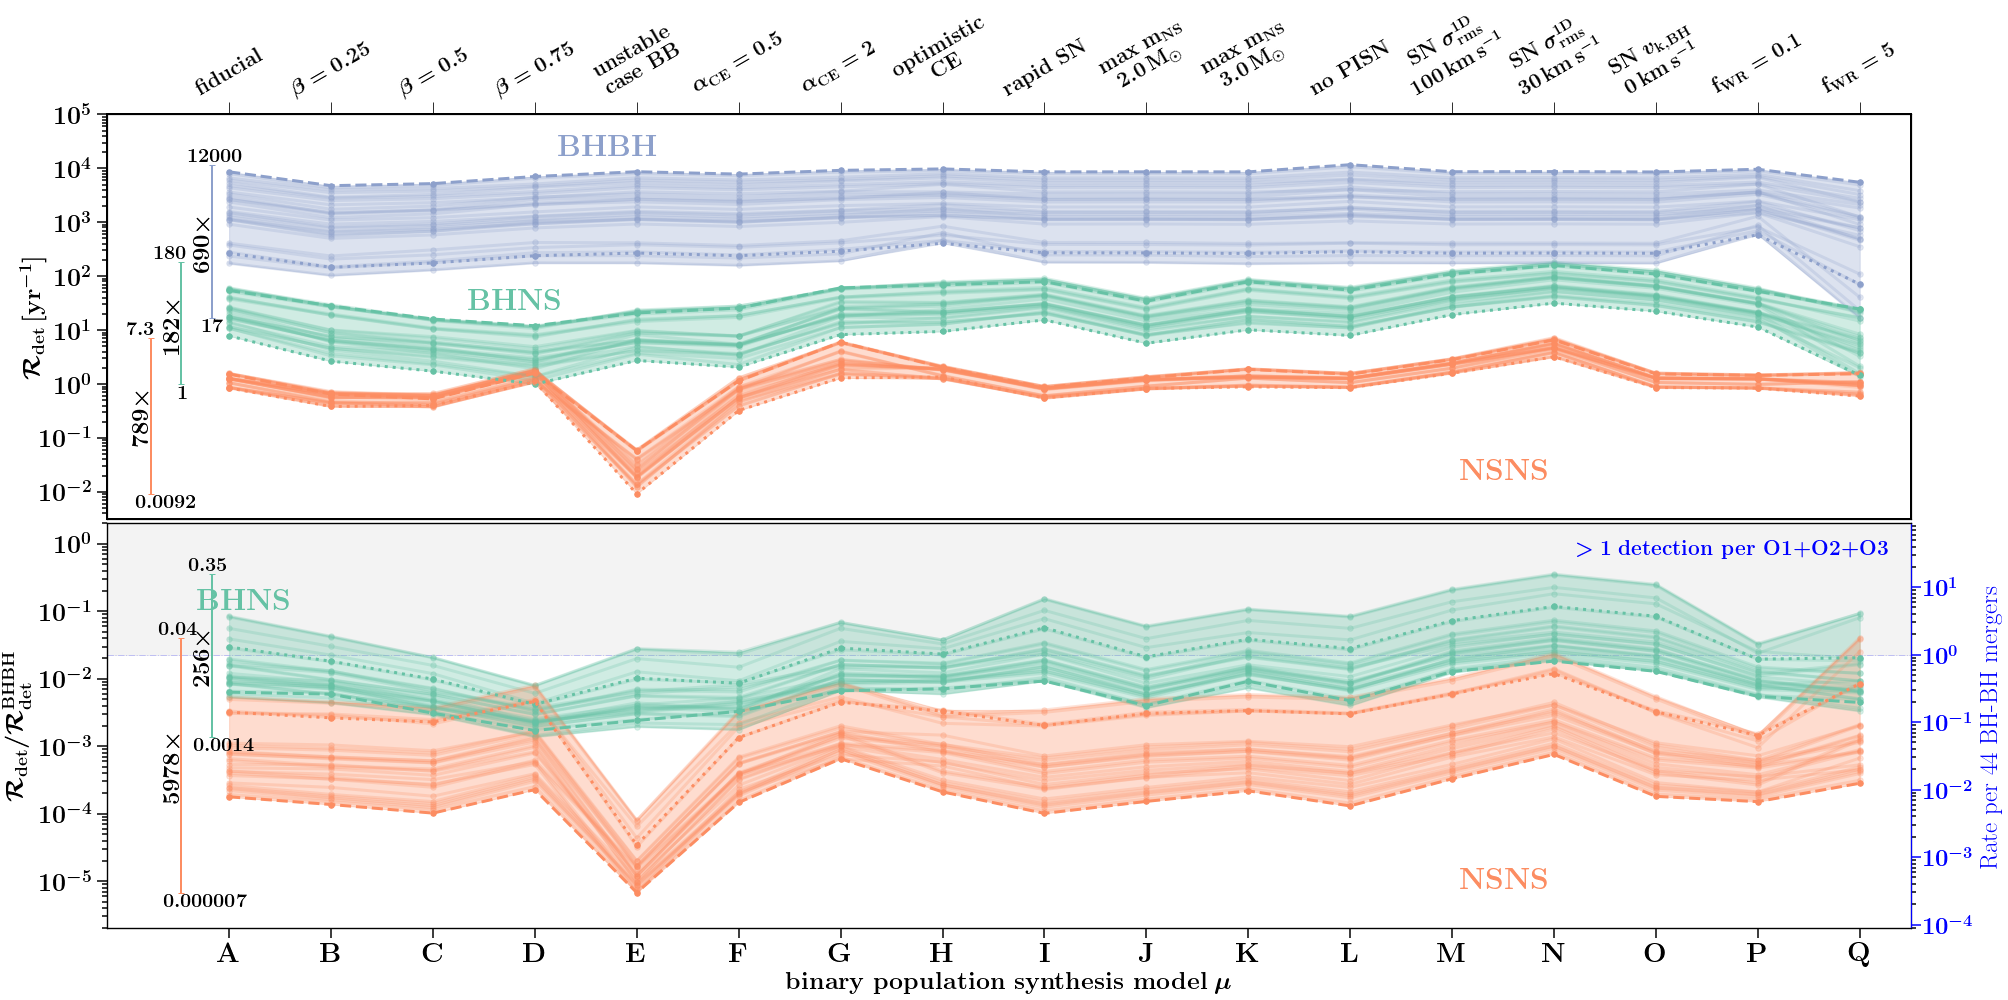

In [6]:
ncols=1
nrows=2
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(28,14))



whichRate='observed'
ylims =[0.0031,1E5]
plot_rates(axe=axe[0], whichRate=whichRate, ylims=ylims)


print()
print()

background = True
ylims =[0.000002,2]
plot_rates_ratio(axe=axe[1], whichRate=whichRate, ylims=ylims)


plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.01)#2)
if background==False:
    plt.savefig('./Rates_' +whichRate + '_ratio.png', dpi=300, transparent=False)#,\
    plt.savefig('./Rates_' +whichRate + '_ratio.pdf')#,\
else:
    plt.savefig('./Rates_' +whichRate + '_ratio_bckground.png', dpi=300, transparent=False)#,\
    plt.savefig('./Rates_' +whichRate + '_ratio_bckground.pdf')#,\
plt.show()

plt.close()






# Single figure

In [4]:
fs = 28 


NSNSrate0 = [320-240,320+490] # Gpc-3 yr-1 from: https://arxiv.org/pdf/2010.14533.pdf
BHBHrate0 = [23.9-8.6, 23.9+14.9] #for z=0  Gpc-3 yr-1 from: https://arxiv.org/pdf/2010.14533.pdf
BHNSrate0 = [0,610] # Gpc-3 yr-1 from: hhttps://arxiv.org/pdf/2010.14533.pdf

NSNSrate1 = [250,2810] # Gpc-3 yr-1 from: https://arxiv.org/pdf/2001.01761.pdf
BHBHrate1 = [9.7,101] # Gpc-3 yr-1 from: https://arxiv.org/pdf/1811.12907.pdf
BHNSrate1 = [0,610] # Gpc-3 yr-1 from: https://arxiv.org/pdf/1811.12907.pdf 


BHBHratez0 = [19.7-15.9, 19.7+57.3] # see point 3 in conclusion https://arxiv.org/pdf/2010.14533.pdf




def plot_rates_ratio(whichRate='intrinsic', ylims=[0,1]):
    ncols=1
    nrows=1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(28,8))
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    
    
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    ObservedRatesListOld = [BHBHrate1, BHNSrate1, NSNSrate1]
    
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    
    maxRatio_BHNS = -100
    maxRatio_BNS = -100
    maxRatio_BHNSBNS = -100
    minRatio_BHNS = 100
    minRatio_BNS = 100    
    minRatio_BHNSBNS =100    

    
    
    # 16 because we do all 17 models minus 'E'
    overall_max_BHNS = np.ones(16) * -100  
    overall_min_BHNS = np.ones(16) *  100
    overall_max_NSNS = np.ones(16) * -100  
    overall_min_NSNS = np.ones(16) *  100
    
    for ind_L, MSSFRname in enumerate(MSSFRnameslist):
        if MSSFRname in  ['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']:

            for ind_t, DCOtype in enumerate(Types):



                stringgg = 'AllDCOsimulation'
                df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/rates_MSSFR_Models_' + TypesLabels[ind_t] + '_' + stringgg + '.csv' 
                df = pd.read_csv(df_name, index_col=0).T
                rates_L = df[MSSFRnameslistCSV[ind_L]]


                if whichRate =='intrinsic':
                    rates = rates_L[::2][0:nModels]
                    if ind_L==0:
                        print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

                    ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'



                elif whichRate=='observed':
                    rates = rates_L[1::2][0:nModels]
                    if ind_L==0:
                        print('the observed fiducial rate for ', DCOtype ,'=',rates[0]) 
#                     ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'
                        ylabel = r'$\mathcal{R}_{\rm{det}} / \mathcal{R}_{\rm{det}}^{\rm{BHBH}}  $'

                # this removes model E from list 
                rates = np.asarray([x for i,x in enumerate(rates) if x!=rates[4]])

                # obtain rates:
                if DCOtype=='BBH':
                    rates_BBH = rates
                elif DCOtype=='BHNS':
                    rates_BHNS = rates
                elif DCOtype=='BNS':
                    rates_BNS = rates

            # obtain ratios
            rates_BHNS = rates_BHNS * (1./rates_BBH)
            rates_BNS = rates_BNS * (1./rates_BBH)
            if ind_L==0:
                print('fiducial BHNS ratio = ', rates_BHNS[0])
                print('fiducial NSNS ratio = ', rates_BNS[0])
                print('per 44 BHBHs:')
                print('fiducial BHNS ratio = ', rates_BHNS[0]*44)
                print('fiducial NSNS ratio = ', rates_BNS[0]*44)                

            if MSSFRname=='231':
                COLOR=TypeColours[ind_t]#'teal'
                zorder=10
                label=MSSFRnameslist[ind_L] 
                ls = MSSFRlinestyles[1]
                ALPHA=1
                lw=3.6
            elif MSSFRname=='312':
                COLOR=TypeColours[ind_t]#'c'
                zorder=10
                label=MSSFRnameslist[ind_L]
                ls = MSSFRlinestyles[2]
                ALPHA=1
                lw=3.6

            else:
                COLOR=TypeColours[ind_t]# 'lightgray' #MSSFRcolors[ind_L]
                zorder=2
                label=None    
                ls = MSSFRlinestyles[0]
                ALPHA=0.24
                lw=3

            if MSSFRname in ['111', '121', '131', '211', '221', '231', '311', '321', '331']:
                COLOR = 'gray'


            maxRatio_BHNS = np.max(np.concatenate(([maxRatio_BHNS], rates_BHNS)))
            maxRatio_BNS  = np.max(np.concatenate(([maxRatio_BNS], rates_BNS)))
            maxRatio_BHNSBNS = np.max(np.concatenate(([maxRatio_BHNSBNS], rates_BHNS/rates_BNS)))
            minRatio_BHNS = np.min(np.concatenate(([minRatio_BHNS], rates_BHNS)))
            minRatio_BNS  = np.min(np.concatenate(([minRatio_BNS], rates_BNS))) 
            minRatio_BHNSBNS = np.min(np.concatenate(([minRatio_BHNSBNS], rates_BHNS/rates_BNS)))
            
            
            overall_max_BHNS = np.amax([overall_max_BHNS, rates_BHNS], axis=0)
            overall_min_BHNS = np.amin([overall_min_BHNS, rates_BHNS], axis=0)
            overall_max_NSNS = np.amax([overall_max_NSNS, rates_BNS], axis=0)
            overall_min_NSNS = np.amin([overall_min_NSNS, rates_BNS], axis=0)         
 


            axe.plot(range(len(rates)), rates_BHNS, c=TypeColours[1], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
            axe.scatter(range(len(rates)), rates_BHNS, c=TypeColours[1], s=30, zorder=zorder, alpha=ALPHA)


            axe.plot(range(len(rates)), rates_BNS, c=TypeColours[2], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
            axe.scatter(range(len(rates)), rates_BNS, c=TypeColours[2], s=30,  zorder=zorder, alpha=ALPHA) 
            
            

            
            
            
        else:
            print('pass MSSFR %s'%MSSFRname)

    axe.fill_between(x=range(len(rates)), y1=overall_min_BHNS, y2=overall_max_BHNS, color=TypeColours[1], alpha=0.3)
    axe.fill_between(x=range(len(rates)), y1=overall_min_NSNS, y2=overall_max_NSNS, color=TypeColours[2], alpha=0.3)   

    ## set some of the axes ranges 
    xmin = -0.8
    xmax = nModels -1.5 # change to len(df.T)
#         xmax_compare = xmax+5


    # FIX
    fix=1


    axe.text(0.05, 0.84, s=r'\textbf{BHNS}', rotation = 0, fontsize = fs+2, color = TypeColours[1], ha = 'left', va='top', transform=axe.transAxes, weight = 'bold')
    axe.text(0.75, 0.15, s=r'\textbf{NSNS}', rotation = 0, fontsize = fs+2, color = TypeColours[2], ha = 'left', va='top', transform=axe.transAxes, weight = 'bold')
#         axe[ind_t,0].text(-0.6, maxx*1.05, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='bottom')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')





    xx = np.linspace(xmin,xmax,15)


    if background==False:
        for ll in [0.001, 0.01, 0.1, 1]:
            axe.plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
    else:
        axe.fill_between(xx, (1/44)*np.ones_like(xx), 2*np.ones_like(xx),  color='lightgray', alpha=0.25,  zorder=0) 
        axe.plot(xx, (1/44)*np.ones_like(xx), c='b', linestyle='dashdot', lw=1, zorder=0, alpha=0.2)
        axe.text(0.815, 0.96, s=r'$>1$ \textbf{detection per O1+O2+O3}', rotation = 0, fontsize = fs-7, color = 'b', ha = 'left', va='top', transform=axe.transAxes, weight = 'bold')
        
#     axe.set_ylim(ylims[0], ylims[1] )


#         # make up axes
#         if ind_t ==2:
    xlabel = r'\textbf{binary population synthesis model} $\mu$'
#         else:
#             xlabel=r'  $\_$ '

    axe.set_xlim(xmin, xmax)
    axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False)
    axe.set_yscale('log')





    BPSnameslist_withoutE = list(string.ascii_uppercase)[0:17]
    BPSnameslist_withoutE.remove('E')

    physicalnames=[]
    for ind_m, bps_model in enumerate(BPSnameslist_withoutE):
        physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
    ax2y = axe.twiny()
    ax2y.set_xlim(xmin, xmax)

    ax2y.set_xticks(range(len(BPSnameslist_withoutE)))
    ax2y.set_xticklabels(physicalnames, fontsize=fs-7, rotation=30)#, orientation=30)      



    physicalnames = []
    for ind_m, bps_model in enumerate(BPSnameslist_withoutE):
        physicalnames.append(r'\textbf{%s}'%(bps_model) )
    axe.set_xticks(range(len(BPSnameslist_withoutE)))
    axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

    axe.set_ylim(ylims[0], ylims[1] )
    axe.set_xlim(xmin, xmax)


    
    ###############################################################
    ax2x = axe.twinx()
    ax2x.set_ylim(ylims[0]*44, ylims[1]*44)


#     ax2x = layoutAxesSpecial(ax2x, nameY='Rate per 44 BH-BH mergers', fontsize=24)
    
    ax2x = layoutAxes(ax2x, nameX=xlabel, nameY='Rate per 44 BH-BH mergers', setMinor=False)
    ax2x.set_yscale('log')
    ax2x.spines["right"].set_edgecolor('b')
    ax2x.tick_params(axis='y', colors='b', labelsize=24)
    ax2x.yaxis.label.set_color('b')


    
    
    ###### LOTS OF LINES, just plotting the Overall error bars on the far left. 
    
    minn_BHNS, maxx_BHNS = minRatio_BHNS, maxRatio_BHNS
    minn_NSNS, maxx_NSNS = minRatio_BNS, maxRatio_BNS


    textt_min_BHNS = r'$ %s $'%roundAndFormat(minn_BHNS)
    textt_max_BHNS = r'$ %s $'%roundAndFormat(maxx_BHNS)
    textt_min_BNS  = r'$ %s $'%roundAndFormat(minn_NSNS)
    textt_max_BNS  = r'$ %s $'%roundAndFormat(maxx_NSNS)        

    axe.text(-0.35,    minn_BHNS, s=textt_min_BHNS, rotation = 0, fontsize = fs-8, color = 'k', ha = 'left', va='top')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')
    axe.text(-0.4,     maxx_BHNS, s=textt_max_BHNS, rotation = 0, fontsize = fs-8, color = 'k', ha = 'left', va='bottom')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')
    axe.text(-0.65,    minn_NSNS, s=textt_min_BNS, rotation = 0, fontsize = fs-8, color = 'k', ha = 'left', va='top')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')
    axe.text(-0.7,     maxx_NSNS, s=textt_max_BNS, rotation = 0, fontsize = fs-8, color = 'k', ha = 'left', va='bottom')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')

    resN = 20
    scatterline_x = -0.25 * np.ones(resN)
    scatterline_BHNS = np.linspace(minn_BHNS,maxx_BHNS, resN)
    scatterline_BNS  = np.linspace(minn_NSNS,maxx_NSNS, resN)
    axe.errorbar(x=-0.17, y=minn_BHNS+((maxx_BHNS-minn_BHNS)/2), yerr=(maxx_BHNS-minn_BHNS)/2, capsize=3, ecolor=TypeColours[1], elinewidth=2)
    axe.errorbar(x=-0.47, y=minn_NSNS+((maxx_NSNS-minn_NSNS)/2), yerr=(maxx_NSNS-minn_NSNS)/2, capsize=3, ecolor=TypeColours[2], elinewidth=2)

    textt_ratioMinMax_BHNS = r'$%s \times$'%int(np.round(maxx_BHNS/minn_BHNS,1)) 
    textt_ratioMinMax_BNS  = r'$%s \times$'%int(np.round(maxx_NSNS/minn_NSNS,1)) 
    yvalue_BHNS =  (10**(np.log10(minn_BHNS)+((np.log10(maxx_BHNS)-np.log10(minn_BHNS))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
    yvalue_BNS  =  (10**(np.log10(minn_NSNS)+((np.log10(maxx_NSNS)-np.log10(minn_NSNS))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
    axe.text(-0.17, yvalue_BHNS, s=textt_ratioMinMax_BHNS, rotation=90, fontsize = fs-4, color='k', ha='right', va='center')
    axe.text(-0.47, yvalue_BNS , s=textt_ratioMinMax_BNS, rotation=90, fontsize = fs-4, color='k', ha='right', va='center')

    
    
    ################################################################
    ################################################################
    ################################################################
    
    
            
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0.06)#2)
    if background==False:
        plt.savefig('./Rates_' +whichRate + '_ratio.png', dpi=300, transparent=False)#,\
        plt.savefig('./Rates_' +whichRate + '_ratio.pdf')#,\
    else:
        plt.savefig('./Rates_' +whichRate + '_ratio_bckground.png', dpi=300, transparent=False)#,\
        plt.savefig('./Rates_' +whichRate + '_ratio_bckground.pdf')#,\
    plt.show()

    plt.close()

    return




the observed fiducial rate for  BBH = 278.87649088232206
the observed fiducial rate for  BHNS = 10.827595525955116
the observed fiducial rate for  BNS = 0.8713062720530261
fiducial BHNS ratio =  0.03882577370253864
fiducial NSNS ratio =  0.003124344649118138
per 44 BHBHs:
fiducial BHNS ratio =  1.7083340429117002
fiducial NSNS ratio =  0.13747116456119807
pass MSSFR 111
pass MSSFR 121
pass MSSFR 131
pass MSSFR 211
pass MSSFR 221
pass MSSFR 231
pass MSSFR 311
pass MSSFR 321
pass MSSFR 331


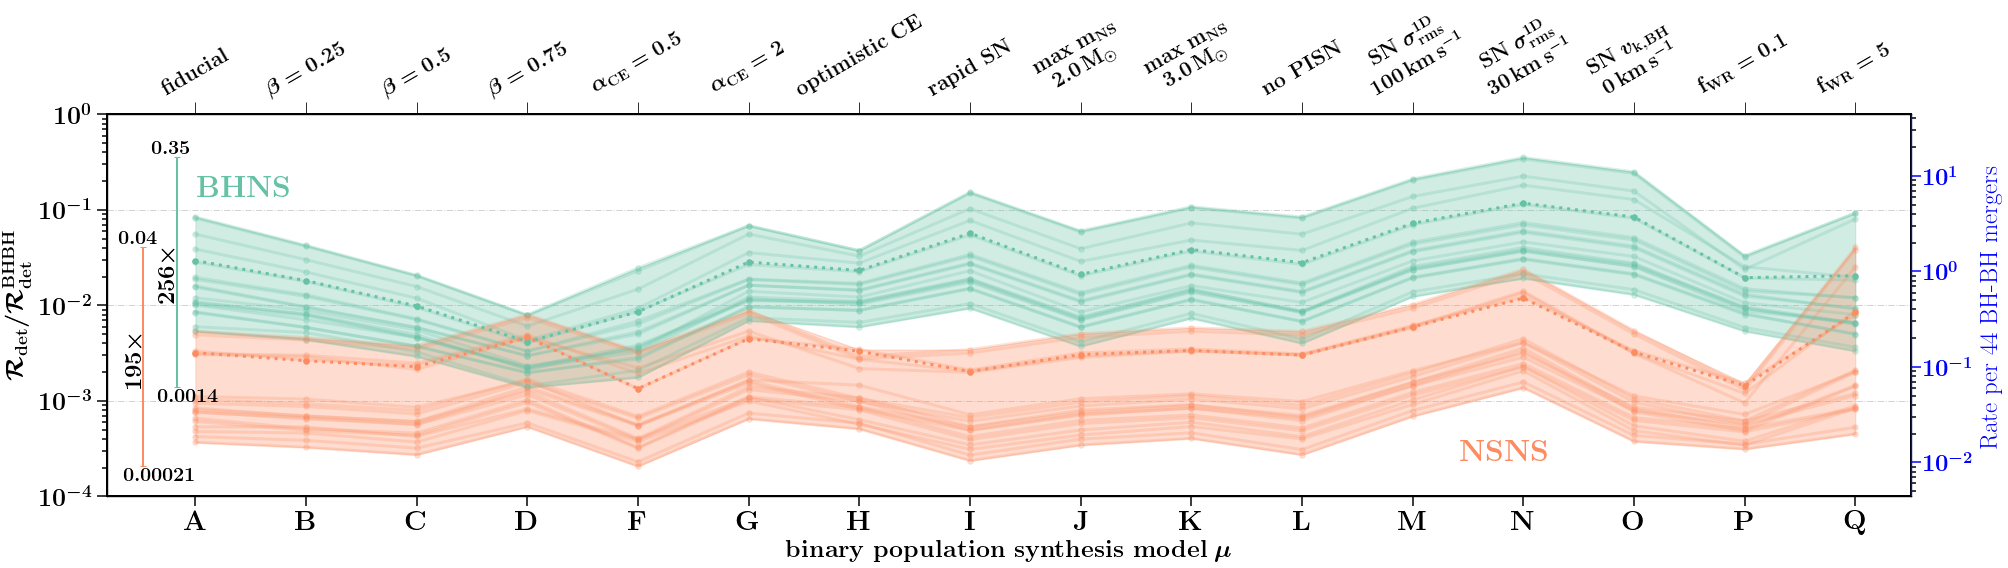

In [5]:

background = False

ylims =[0.0001,1]
plot_rates_ratio(whichRate='observed', ylims=ylims)




the observed fiducial rate for  BBH = 278.87649088232206
the observed fiducial rate for  BHNS = 10.827595525955116
the observed fiducial rate for  BNS = 0.8713062720530261
fiducial BHNS ratio =  0.03882577370253864
fiducial NSNS ratio =  0.003124344649118138
per 44 BHBHs:
fiducial BHNS ratio =  1.7083340429117002
fiducial NSNS ratio =  0.13747116456119807
pass MSSFR 111
pass MSSFR 121
pass MSSFR 131
pass MSSFR 211
pass MSSFR 221
pass MSSFR 231
pass MSSFR 311
pass MSSFR 321
pass MSSFR 331


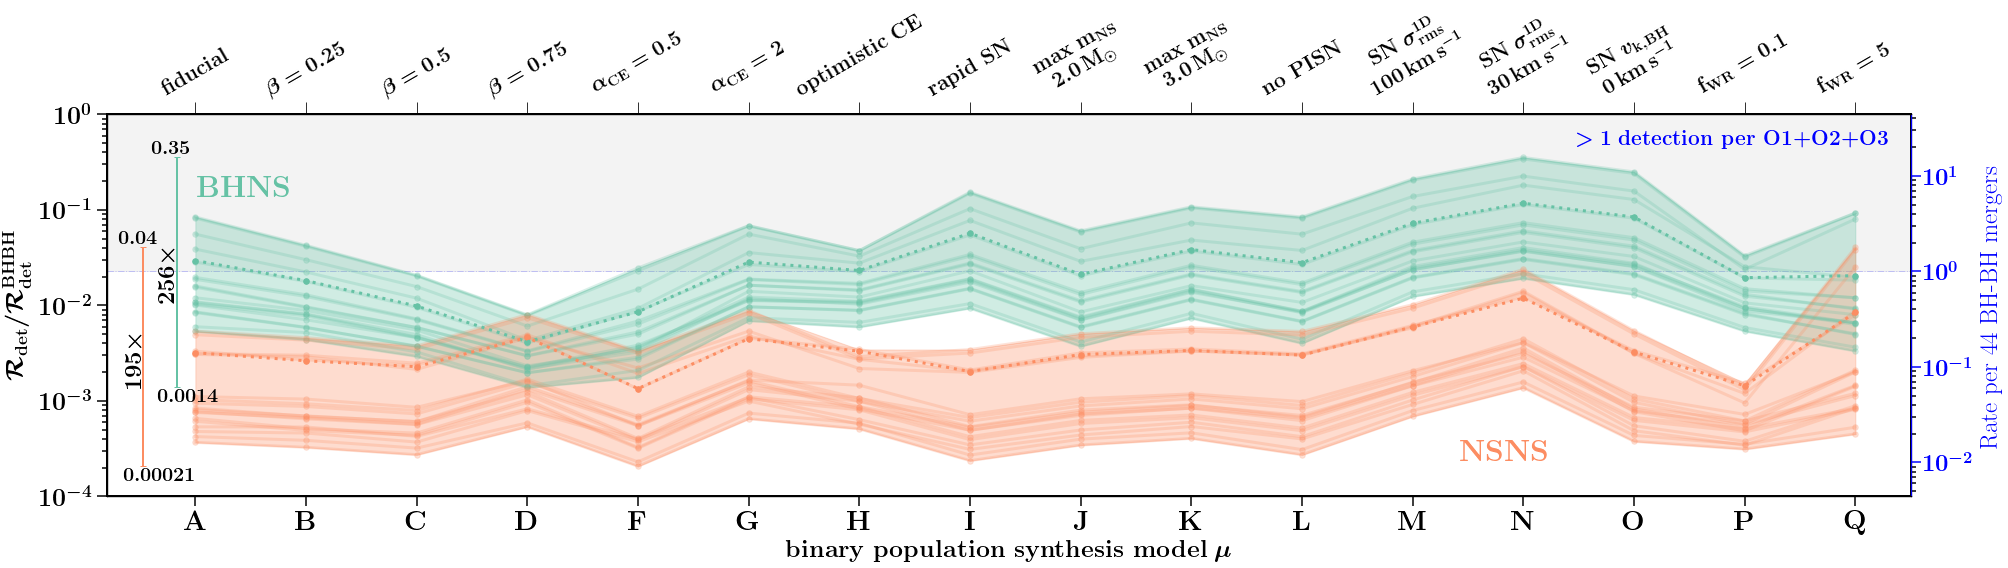

In [6]:

background = True

ylims =[0.0001,1]
plot_rates_ratio(whichRate='observed', ylims=ylims)


